1) Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this dataset? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that you may find a solution with more than three clusters that nevertheless better tracks the real, trinary outcome. For example, two of those clusters may map to a single flower type, while the other two map to the other types.

In [1]:
#!pip install psycopg2 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sqlalchemy import create_engine

import warnings

warnings.filterwarnings('ignore')

2) In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

* Load the dataset from Thinkful's database. To connect to the database, use these credentials:

 postgres_user = 'dsbc_student'
 
 postgres_pw = '7*.8G9QH21'
 
 postgres_host = '142.93.121.174'
 
 postgres_port = '5432'
 
 postgres_db = 'heartdisease'

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
heart_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The dataset needs some preprocessing. So, before working with the dataset, apply the following code:

* Define the features and the outcome
 X = heartdisease_df.iloc[:, :13]
 y = heartdisease_df.iloc[:, 13]

* Replace missing values (marked by `?`) with a `0`
 X = X.replace(to_replace='?', value=0)

* Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
 y = np.where(y > 0, 0, 1)
 
Here, X will represent your features and y will hold the labels. If y is equal to 1, that indicates that the corresponding patient has heart disease. And if y is equal to 0, then the patient doesn't have heart disease.

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

In [7]:
X = X.replace(to_replace='?', value=0)

In [8]:
y = np.where(y > 0, 0, 1)

In [9]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [10]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Create a k-means solution that correctly assigns patients to heart disease diagnosis or no heart disease diagnosis clusters. Note that in this case, you actually know the correct number of clusters in the data (two). But you'll test whether k-means assigns observations as you expect it to. Because k-means is an unsupervised learning algorithm, it will be blind to whether or not the patients have heart disease.

In [11]:
all_data = pd.DataFrame(X)
all_data['diagnosis'] = y
all_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,0


In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          303 non-null    float64
 1   1          303 non-null    float64
 2   2          303 non-null    float64
 3   3          303 non-null    float64
 4   4          303 non-null    float64
 5   5          303 non-null    float64
 6   6          303 non-null    float64
 7   7          303 non-null    float64
 8   8          303 non-null    float64
 9   9          303 non-null    float64
 10  10         303 non-null    float64
 11  11         303 non-null    object 
 12  12         303 non-null    object 
 13  diagnosis  303 non-null    int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 32.1+ KB


In [13]:
all_data['11'] = all_data['11'].astype(float)
all_data['12'] = all_data['12'].astype(float)

In [20]:
scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

In [21]:
k_means = KMeans(n_clusters=2, random_state=66)
%timeit k_means.fit(all_data)
y_pred = k_means.predict(all_data)

33.4 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [23]:
# for col in all_data.columns:
#     print(col)
#     plt.scatter(all_data[col], all_data['diagnosis'], c=y_pred)
#     plt.show()

In [24]:
# samp1 = all_data.sample(len(y_pred), random_state=66)
# samp2 = all_data.sample(len(y_pred), random_state=66)

In [28]:
all_data

array([[ 0.94872647,  0.68620244, -2.25177456, ..., -0.71113139,
         0.65913253,  0.92063075],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  2.5048807 ,
        -0.86542592, -1.08621182],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.43287667,
         1.16731868, -1.08621182],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.36087264,
         1.16731868, -1.08621182],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.36087264,
        -0.86542592, -1.08621182],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.71113139,
        -0.86542592,  0.92063075]])

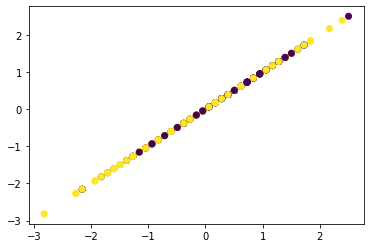

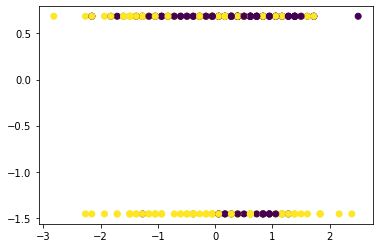

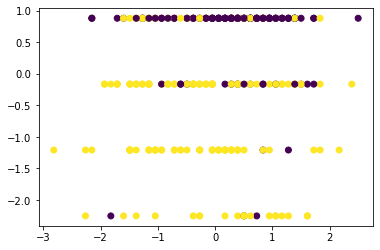

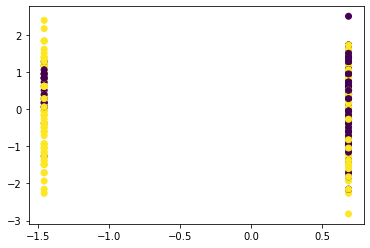

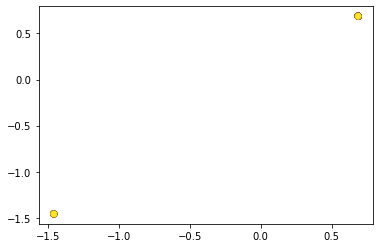

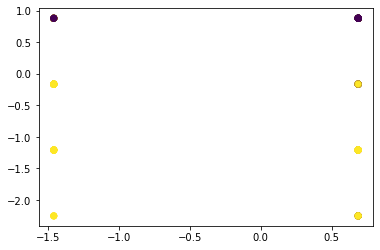

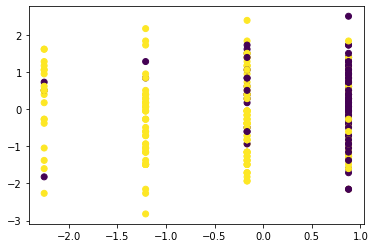

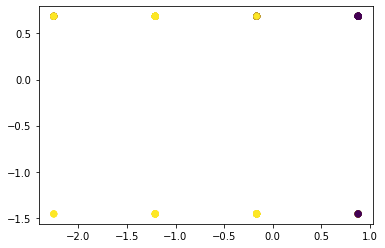

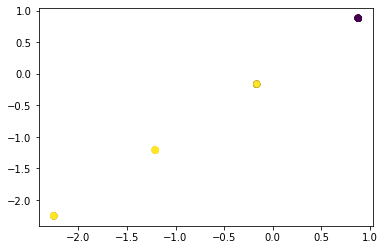

In [45]:
# Plot the solution
all_data = pd.DataFrame(all_data)
#cols_3[0]
for i in range(0, 3):
  for j in range(0, 3):
    plt.scatter(all_data[i], all_data[j], c=y_pred)
    plt.show()